In [1633]:
import activation_func as fn
from model import Model
from layer import Layer
from loss_func import MSE
from data_loader import DataLoader

In [1634]:
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt

In [1635]:
def draw_from_pixels(img):
    first_image_pixels = img
    image_shape = (28, 28)  

    image_array = np.array(first_image_pixels).reshape(image_shape)

    plt.imshow(image_array, cmap='gray')
    plt.show()

In [1636]:
discriminator = Model()

discriminator = discriminator.load('models/discriminator1.pickle')

In [1637]:
generator = Model(learning_rate=10e-6)

generator.add_layer(Layer(in_features=100, out_features=7*7, activation_function=fn.LeakyReLU(0.2)))
generator.add_layer(Layer(in_features=7*7, out_features=14*14, activation_function=fn.LeakyReLU(0.2)))
generator.add_layer(Layer(in_features=14*14, out_features=56*56, activation_function=fn.LeakyReLU(0.2)))
generator.add_layer(Layer(in_features=56*56, out_features=28*28, activation_function=fn.LeakyReLU(0.2)))

In [1638]:
class GenTrainer:
    def __init__(self, generator, discriminator):
        self.generator = generator
        self.discriminator = discriminator

        self.generator.train()
        self.discriminator.eval()

    def train(self, input, y):
        output = generator.forward(input)
        
        evaluation = discriminator.forward(output)

        error = discriminator.backward(y)
        generator.backward_from(error)

        return output, evaluation


In [1639]:
prompt = 3

In [1640]:
trainer = GenTrainer(generator, discriminator)

In [1641]:
one_hot_prompt = np.zeros(10)
one_hot_prompt[prompt] = 1

In [1642]:
num_epochs = 200
early_stopping_patience=20

In [1643]:
iter = 0
best_output = None
best_result = 10*10

no_proggress_cnt = 0

for epoch in range(num_epochs):
    z = np.random.uniform(0, 255, 100)

    output, evaluation = trainer.train(z, one_hot_prompt)

    result = MSE(evaluation, one_hot_prompt)
    no_proggress_cnt += 1

    if result < best_result:
        best_result = result
        best_output = output.copy()
        no_proggress_cnt = 0
    

    if epoch % 4 == 0:
        print(f"{epoch}: {result}, evaluation = {evaluation[prompt]}")
        # draw_from_pixels(output)
        iter+=1

    if no_proggress_cnt == early_stopping_patience:
        print("Early stop")
        print(best_result)
        break



0: 0.05705999090295476, evaluation = 0.39731495191583277
4: 4.0861362563801936e-11, evaluation = 0.9999846333379357
8: 3.88158517630719e-11, evaluation = 0.9999850275209805
12: 3.9563354554267886e-11, evaluation = 0.9999849295237805
16: 3.6331044328609066e-11, evaluation = 0.999985523399795
20: 3.213620774877816e-11, evaluation = 0.9999862889535203
24: 3.2316855708302375e-11, evaluation = 0.999986290032903
28: 2.8925710144026067e-11, evaluation = 0.9999869473625002
32: 2.7829293799288223e-11, evaluation = 0.9999871902193355
36: 2.5888617322900334e-11, evaluation = 0.9999875952584536
40: 2.554018854114209e-11, evaluation = 0.9999876985405775
44: 2.5109137612705595e-11, evaluation = 0.9999878070041298
48: 2.3430239336564814e-11, evaluation = 0.9999881777113135
52: 2.319874860109004e-11, evaluation = 0.9999882547183793
56: 2.035734352931159e-11, evaluation = 0.9999888863790186
60: 2.0185087553743076e-11, evaluation = 0.9999889510067147
64: 1.955441014817484e-11, evaluation = 0.99998911246

In [1644]:
z = np.random.uniform(0, 255, 100)
y = generator.predict(np.array([z]))

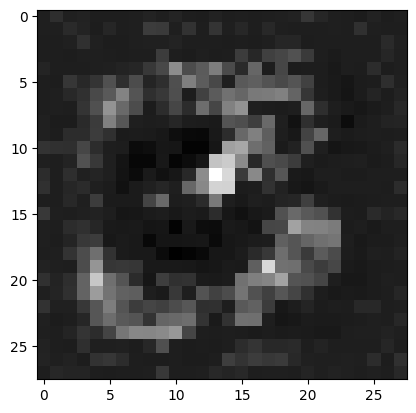

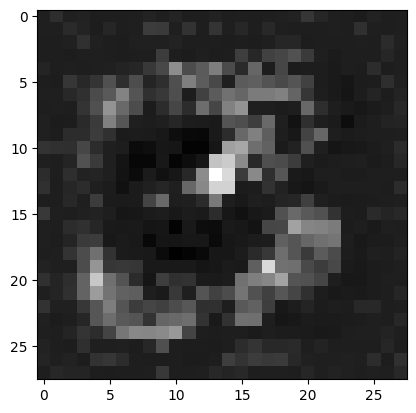

In [1645]:
draw_from_pixels(y)
draw_from_pixels(best_output)

In [1646]:
discriminator.predict(y)

array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]])